In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Importing the data

In [4]:
data = pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [5]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Segregating variables - Dependent & Independent 

In [6]:
#seperating independent and dependent variables

data_x = data.drop(['churn'], axis=1)
data_y = data['churn']

#### Scaling the data

In [7]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y, random_state = 56)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

### Implementing Decesion Tree

Q1: __Fill the correct values to implement Decision Tree and find out accuracy, precision, and recall for Test Set__?

In [8]:
#importing Decision tree and metric accuracy score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report

# Creating instance of Tree

tree =  DecisionTreeClassifier(class_weight='balanced')

# Fitting the model
tree.fit(train_x,train_y)

train_predict=tree.predict(train_x)
a=classification_report(train_y,train_predict)
print("train acuracy: ",a)

# Predicting over the Test Set and accuracy-score
test_predict = tree.predict(test_x)
k = classification_report(test_y,test_predict)
print('Test accuracy_score    ', k)
from sklearn.metrics import precision_score
k = precision_score(test_y,test_predict)
print('Test precision_score    ', k)
from sklearn.metrics import recall_score
k = recall_score(test_y,test_predict)
print('Test recall_score    ', k)

train acuracy:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13384
           1       1.00      1.00      1.00      3166

    accuracy                           1.00     16550
   macro avg       1.00      1.00      1.00     16550
weighted avg       1.00      1.00      1.00     16550

Test accuracy_score                   precision    recall  f1-score   support

           0       0.85      0.86      0.85      4409
           1       0.42      0.42      0.42      1108

    accuracy                           0.77      5517
   macro avg       0.64      0.64      0.64      5517
weighted avg       0.77      0.77      0.77      5517

Test precision_score     0.4211485870556062
Test recall_score     0.41696750902527074


Q2: __Fill the correct values for getting Train and Test set accuracy by implementing Decision Tree with the depth range as 3-30?__

In [9]:
from sklearn.metrics import f1_score

dp_list = [i for i in range(3,30)]
train = []
test = []

for depth in dp_list:
    tree = DecisionTreeClassifier(class_weight='balanced',max_depth=depth)
    tree.fit(train_x,train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = f1_score(train_y,trainpred)
    test_acc = f1_score(test_y,prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'max_depth':dp_list,'Train_acc':train,'Test_acc':test})


performance.head()

,max_depth,Train_acc,Test_acc
0,3,0.505563,0.513149
1,4,0.543490,0.527405
2,5,0.565977,0.538131
3,6,0.584301,0.553994
4,7,0.607004,0.542702


Q3: __Plot the train and test set accuracy after implementing Decision Tree with the depth range as 3-30?__

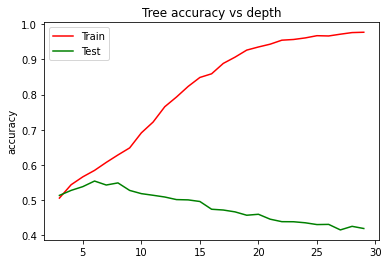

In [10]:
plt.plot(dp_list, performance['Train_acc'],c='red', label='Train')
plt.plot(dp_list,performance['Test_acc'],c='green' ,label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs depth')
plt.show()

Q4: __Implement Decision Tree with the mimimum sample leaf as 1-30 and plot the Train and Test set accuracy  ?__

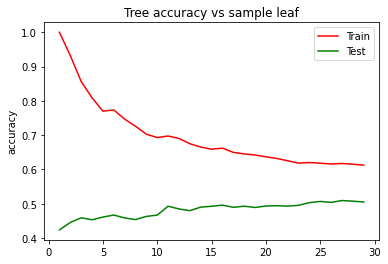

In [11]:
sam_list = [i for i in range(1,30)]
train = []
test = []

for sam in sam_list:
    tree = DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=sam)
    tree.fit(train_x,train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = f1_score(train_y,trainpred)
    test_acc = f1_score(test_y,prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'min_samples_leaf':sam_list,'Train_acc':train,'Test_acc':test})

plt.plot(sam_list,train,c='red', label='Train')
plt.plot(sam_list,test,c='green', label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample leaf')
plt.show()



Q5: __Implement Decision Tree with the mimimum sample split as all even numbers between 2 and 40 and plot the Train and Test set accuracy  ?__

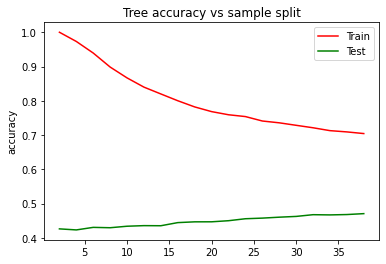

In [12]:
sam_list = [i for i in range(2,40,2)]
train = []
test = []

for sam in sam_list:
    tree = DecisionTreeClassifier(class_weight='balanced',min_samples_split=sam)
    tree.fit(train_x,train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = f1_score(train_y,trainpred)
    test_acc = f1_score(test_y,prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'min_samples_split':sam_list,'Train_acc':train,'Test_acc':test})

plt.plot(sam_list,train,c='red', label='Train')
plt.plot(sam_list,test,c='green', label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample split')
plt.show()




Q6: __Implement a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.__

In [20]:
type(x)

pandas.core.frame.DataFrame

In [33]:
help(StratifiedKFold)

Help on class StratifiedKFold in module sklearn.model_selection._split:

class StratifiedKFold(_BaseKFold)
 |  StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)
 |  
 |  Stratified K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a variation of KFold that returns
 |  stratified folds. The folds are made by preserving the percentage of
 |  samples for each class.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  shuffle : bool, default=False
 |      Whether to shuffle each class's samples before splitting into batches.
 |      Note that the samples within each split will not be shuffled.
 |  
 |  random_state : int or RandomState instance, default=None
 |     

In [31]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import statistics as stt

i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
kf.get_n_splits(x,y)
for train_index,test_index in kf.split(data_x,data_y):
    print('\n{} of kfold {}'.format(i,5))   
    xtr,xvl = data_x.loc[train_index],data_x.loc[test_index]     
    ytr,yvl = data_y.loc[train_index],data_y.loc[test_index]         
    model = DecisionTreeClassifier(random_state=1)     
    model.fit(xtr,ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    accuracy_list.append(score)
    print('accuracy_score',score)     
    i+=1

print()    
print("Mean accuracy across the fold is : ",stt.mean(accuracy_list))    
    


1 of kfold 5
accuracy_score 0.771635704576348

2 of kfold 5
accuracy_score 0.7673312188491165

3 of kfold 5
accuracy_score 0.7795150691139814

4 of kfold 5
accuracy_score 0.7799682755495128

5 of kfold 5
accuracy_score 0.7697711307500567

Mean accuracy across the fold is :  0.773644279767803
